Artigo: "An Optimized LSTM Neural Network for Accurate Estimation of Software Development Effort"

O objetivo deste trabalho de pesquisa é comparar uma rede neural otimizada de memória de curto prazo, baseada na otimização de enxame de partículas, com seis métodos de aprendizado de máquina usados para prever o esforço de desenvolvimento de software: vizinhos K-mais próximos, árvore de decisão, floresta aleatória, árvore impulsionada por gradiente, perceptron multicamadas e memória de curto prazo de longo prazo. O processo de estimativa do esforço utiliza cinco conjuntos de dados: China e Desharnais, para os quais as saídas são expressas em horas-pessoa; e Albrecht, Kemerer e Cocomo81, para os quais as saídas são medidas em pessoas-mês. Para comparar a acurácia desses métodos inteligentes foram utilizadas quatro métricas: erro absoluto médio, erro absoluto mediana, raiz quadrática do erro quadrático médio e coeficiente de determinação. Para todos os cinco conjuntos de dados, com base em valores métricos, concluiu-se que o método inteligente de memória de curto prazo otimizado proposto prevê com mais precisão o esforço necessário para desenvolver um produto de software.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import arff
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
file_paths = [
    'datasets_2/albrecht.arff',
    'datasets_2/kemerer.arff',
    'datasets_2/cocomo81.arff',
    #'datasets_2/desharnais.arff',
    'datasets_2/china.arff',
]

In [3]:
# Para cada arquivo ARFF
for file_path in file_paths:
    print(f"\n\n\nAnalizando o arquivo: {file_path}")
    with open(file_path, 'r') as f:
        data = arff.load(f)

    # Exibir algumas informações sobre o arquivo ARFF
    print("Atributos:", [attr[0] for attr in data['attributes']])
    print("Número de instâncias:", len(data['data']))
    print("Primeira instância:", data['data'][0])
    print("Última instância:", data['data'][-1])
    print()





Analizando o arquivo: datasets_2/albrecht.arff
Atributos: ['Input', 'Output', 'Inquiry', 'File', 'FPAdj', 'RawFPcounts', 'AdjFP', 'Effort']
Número de instâncias: 24
Primeira instância: [25.0, 150.0, 75.0, 60.0, 1.0, 1750.0, 1750.0, 102.4]
Última instância: [12.0, 15.0, 0.0, 15.0, 0.95, 273.68, 260.0, 6.1]




Analizando o arquivo: datasets_2/kemerer.arff
Atributos: ['ID', 'Language', 'Hardware', 'Duration', 'KSLOC', 'AdjFP', 'RAWFP', 'EffortMM']
Número de instâncias: 15
Primeira instância: [1.0, 1.0, 1.0, 17.0, 253.6, 1217.1, 1010.0, 287.0]
Última instância: [15.0, 3.0, 1.0, 14.0, 60.2, 1044.3, 976.0, 69.9]




Analizando o arquivo: datasets_2/cocomo81.arff
Atributos: ['rely', 'data', 'cplx', 'time', 'stor', 'virt', 'turn', 'acap', 'aexp', 'pcap', 'vexp', 'lexp', 'modp', 'tool', 'sced', 'loc', 'actual']
Número de instâncias: 63
Primeira instância: [0.88, 1.16, 0.7, 1.0, 1.06, 1.15, 1.07, 1.19, 1.13, 1.17, 1.1, 1.0, 1.24, 1.1, 1.04, 113.0, 2040.0]
Última instância: [1.0, 0.94, 1.15, 

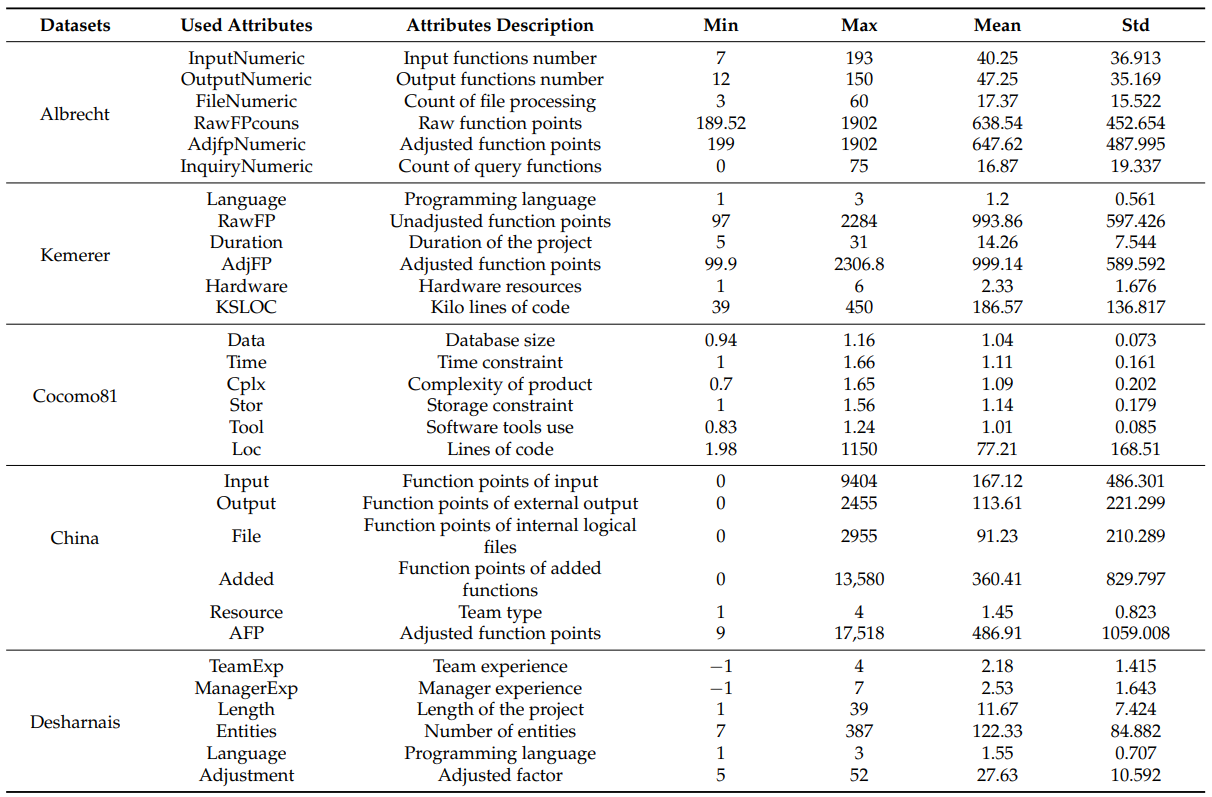

Para a estimativa do esforço, seis métodos de aprendizado de máquina foram escolhidos: vizinhos K-mais próximos (KNN), árvore de decisão (DT), floresta aleatória (RF), árvore aumentada por gradiente (GBT), perceptron multicamadas (MLP) e memória de curto prazo longa (LSTM

A metodologia da pesquisa consistiu no processamento do conjunto de dados, divisão dos dados processados para treinamento e teste e computação do modelo CBR-GA.

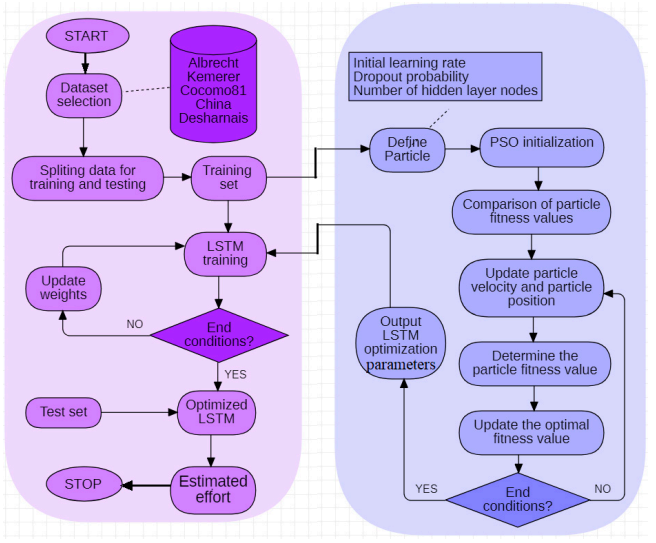

In [4]:
pip install tabulate

You should consider upgrading via the '/home/leonardodev/.pyenv/versions/3.8.14/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# K-Nearest Neighbours


O KNN (K-Nearest Neighbors) é um algoritmo de aprendizado supervisionado usado para classificação e regressão. Ele classifica um ponto de dados com base na maioria das classes dos k vizinhos mais próximos (no caso da classificação) ou calcula a média dos k vizinhos mais próximos (no caso da regressão).

[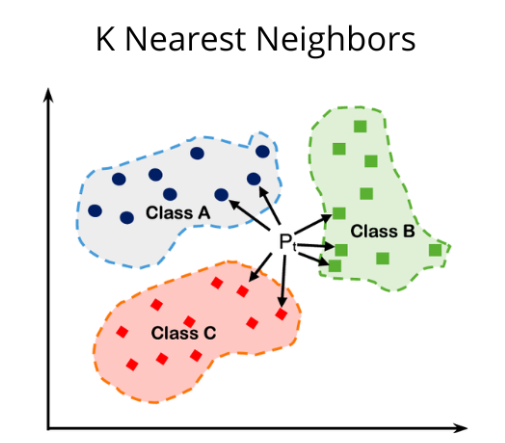](https://youtu.be/gJK4fmCvcWY)


 Click in the image for watch the video!

Util links: 

 - https://scikit-learn.org/stable/modules/neighbors.html#regression

[![image.svg](https://upload.wikimedia.org/wikipedia/commons/1/19/Overfitting.svg)](https://youtu.be/o3DztvnfAJg)


 Click in the image for watch the video!

### Implementação com treinamento em KNN -> treina em "train" e testa em "train"

In [ ]:
import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/knn/sem-pre/output_knn.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

metrics_data = []

n_neighbors = 5  
leaf_size = 30  
weights = 'uniform'  
p_values = [1, 2]  # Power parameter for Minkowski distance (Euclidean distance)

k_values = range(3, 10)

for file_path in file_paths:
    X, y = load_arff(file_path)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for k in k_values:
        for p in p_values:
            if p == 1:
                distance_metric = 'manhattan'
            elif p == 2:
                distance_metric = 'euclidean'
            else:
                distance_metric = 'minkowski'
                
            knn = KNeighborsRegressor(n_neighbors=k, weights=weights, p=p, leaf_size=leaf_size, metric=distance_metric)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
            metrics_data.append([file_path, "MAE", mae, p, k, y_pred])
            metrics_data.append([file_path, "Median Absolute Error", medae, p, k, y_pred])
            metrics_data.append([file_path, "RMSE", rmse, p, k, y_pred])
            metrics_data.append([file_path, "R2 Score", r2, p, k, y_pred])

headers = ["Dataset", "Metric", "metric valor", "p", "k", "prediction"]
print(tabulate(metrics_data, headers=headers))

sys.stdout.close()
sys.stderr.close()

### Explicando as métricas (MAE, Median Absolute Error, RMSE, R2 Score)

# KNN rodando X vezes

Divisão: 20% teste - 80% treinamento. <p>
Análise em cima do treino e depois é utilizado no teste

In [ ]:
import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate
import sys

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/knn/sem-pre/output_knn_2_kp.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

metrics_data = []

n_neighbors = 5  
leaf_size = 30  
weights = 'uniform'  
p_values = [1, 2]  # Power parameter for Minkowski distance (Euclidean distance)

k_values = range(3, 10)

num_runs = 100

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        for k in k_values:
            for p in p_values:
                if p == 1:
                    distance_metric = 'manhattan'
                elif p == 2:
                    distance_metric = 'euclidean'
                else:
                    distance_metric = 'minkowski'
                    
                knn = KNeighborsRegressor(n_neighbors=k, weights=weights, p=p, leaf_size=leaf_size, metric='minkowski')
                #knn = KNeighborsRegressor(n_neighbors=k, weights=weights, p=p, leaf_size=leaf_size)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, "MAE", mae,p,k])
                metrics_data.append([file_path, "Median Absolute Error", medae,p,k])
                metrics_data.append([file_path, "RMSE", rmse,p,k])
                metrics_data.append([file_path, "R2 Score", r2,p,k])

headers = ["Dataset", "Metric", "metric valor", "p", "k"]
print(tabulate(metrics_data, headers=headers))

sys.stdout.close()
sys.stderr.close()


# Sem K e P

In [ ]:
import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate
import sys

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/knn/sem-pre/output_knn_2_no_kp.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

metrics_data = []

n_neighbors = 5  
leaf_size = 30  
weights = 'uniform'  
p_values = [1, 2]  # Power parameter for Minkowski distance (Euclidean distance)

k_values = range(3, 10)

num_runs = 30

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        for k in k_values:
            for p in p_values:
                if p == 1:
                    distance_metric = 'manhattan'
                elif p == 2:
                    distance_metric = 'euclidean'
                else:
                    distance_metric = 'minkowski'
                    
                knn = KNeighborsRegressor(n_neighbors=k, weights=weights, p=p, leaf_size=leaf_size, metric=distance_metric)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, "MAE", mae])
                metrics_data.append([file_path, "Median Absolute Error", medae])
                metrics_data.append([file_path, "RMSE", rmse])
                metrics_data.append([file_path, "R2 Score", r2])

headers = ["Dataset", "Metric", "metric valor"]
print(tabulate(metrics_data, headers=headers))

sys.stdout.close()
sys.stderr.close()


### Para uma análise mais robusta, vamos calcular a média e a variância das métricas após as 30 execuções.

In [ ]:
import re
import numpy as np
import sys

output_file = "./results/knn/sem-pre/output_knn_analises_no_kp.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

cont = 0

datasets = {
    "albrecht": {},
    "kemerer": {},
    "cocomo81": {},
    "china": {}
}

def extract_metrics_values(filename):
    global cont
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip():
                continue
            
            match = re.match(r'.*?([A-Za-z0-9_/.]+)\s+(.*?)\s+([\d.]+)', line)
            if match:
                dataset, metric, value = match.groups()
                value = float(value)
                #print("dataset | metric | value:    " + dataset + " | " + metric + " | " + str(value))

                if "albrecht.arff" in dataset:
                    dataset_key = "albrecht"
                elif "kemerer.arff" in dataset:
                    dataset_key = "kemerer"
                elif "cocomo81.arff" in dataset:
                    dataset_key = "cocomo81"
                elif "china.arff" in dataset:
                    dataset_key = "china"
                #else:
                    #print(f"Dataset not recognized: {dataset}", file=sys.stderr)
                    #continue
                
                if metric not in datasets[dataset_key]:
                    datasets[dataset_key][metric] = [value]
                else:
                    datasets[dataset_key][metric].append(value)
                
                cont += 1
            #else:
                #print(f"Line did not match: {line.strip()}", file=sys.stderr)

def calculate_statistics(metrics):
    results = {}
    for metric, values in metrics.items():
        results[metric] = {
            'Média': np.mean(values),
            'Mínimo': np.min(values),
            'Máximo': np.max(values),
            'Desvio Padrão': np.std(values)
        }
    return results

filename = './results/knn/sem-pre/output_knn_2_no_kp.txt'

extract_metrics_values(filename)

for dataset_name, metrics in datasets.items():
    print(f"Estatísticas para o dataset: {dataset_name}")
    statistics = calculate_statistics(metrics)
    for metric, values in statistics.items():
        print(f"Métrica: {metric}")
        print(f"   Média: {values['Média']:.4f}")
        print(f"   Mínimo: {values['Mínimo']:.4f}")
        print(f"   Máximo: {values['Máximo']:.4f}")
        print(f"   Desvio Padrão: {values['Desvio Padrão']:.4f}")
    print("/n")

#print("Número de iterações das métricas: " + str(cont))

sys.stdout.close()
sys.stderr.close()


# P e K

In [ ]:
import re
import numpy as np
import sys

# Redirecting stdout and stderr to the specified file
output_file = "./results/knn/sem-pre/output_knn_analises_p_k.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

cont = 0

# Dictionary to store metrics with nested structure for datasets, p, k, and metrics
datasets = {
    "albrecht": {},
    "kemerer": {},
    "cocomo81": {},
    "china": {}
}

def extract_metrics_values(filename):
    global cont
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip() or line.startswith('-'):
                continue
            
            # Updated regex to capture p and k values
            match = re.match(r'.*?([A-Za-z0-9_/.]+)\s+(.*?)\s+([\d.]+)\s+(\d+)\s+(\d+)', line)
            if match:
                dataset, metric, value, p, k = match.groups()
                value = float(value)
                p = int(p)
                k = int(k)
                
                if "albrecht.arff" in dataset:
                    dataset_key = "albrecht"
                elif "kemerer.arff" in dataset:
                    dataset_key = "kemerer"
                elif "cocomo81.arff" in dataset:
                    dataset_key = "cocomo81"
                elif "china.arff" in dataset:
                    dataset_key = "china"
                else:
                    print(f"Dataset not recognized: {dataset}", file=sys.stderr)
                    continue

                # Initialize nested dictionaries if not already done
                if p not in datasets[dataset_key]:
                    datasets[dataset_key][p] = {}
                if k not in datasets[dataset_key][p]:
                    datasets[dataset_key][p][k] = {}
                if metric not in datasets[dataset_key][p][k]:
                    datasets[dataset_key][p][k][metric] = []

                # Append the metric value
                datasets[dataset_key][p][k][metric].append(value)
                cont += 1
            else:
                print(f"Line did not match: {line.strip()}", file=sys.stderr)

def calculate_statistics(metrics):
    results = {}
    for metric, values in metrics.items():
        results[metric] = {
            'Média': np.mean(values),
            'Mínimo': np.min(values),
            'Máximo': np.max(values),
            'Desvio Padrão': np.std(values)
        }
    return results

filename = './results/knn/sem-pre/output_knn_2_kp.txt'
extract_metrics_values(filename)

# Iterate through the datasets and print statistics
for dataset_name, p_values in datasets.items():
    print(f"Estatísticas para o dataset: {dataset_name}")
    for p, k_values in p_values.items():
        for k, metrics in k_values.items():
            print(f"  Para p = {p}, k = {k}:")
            statistics = calculate_statistics(metrics)
            for metric, values in statistics.items():
                print(f"    Métrica: {metric}")
                print(f"      Média: {values['Média']:.4f}")
                print(f"      Mínimo: {values['Mínimo']:.4f}")
                print(f"      Máximo: {values['Máximo']:.4f}")
                print(f"      Desvio Padrão: {values['Desvio Padrão']:.4f}")
            print()  # Add a new line for better readability

#print("Número de iterações das métricas: " + str(cont))

sys.stdout.close()
sys.stderr.close()


In [ ]:
import re
import numpy as np
import sys

# Redirecting stdout and stderr to the specified file
output_file = "./results/knn/sem-pre/output_knn_analises_p_k_best.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

cont = 0

# Dictionary to store metrics with nested structure for datasets, p, k, and metrics
datasets = {
    "albrecht": {},
    "kemerer": {},
    "cocomo81": {},
    "china": {}
}

def extract_metrics_values(filename):
    global cont
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip() or line.startswith('-'):
                continue
            
            # Updated regex to capture p and k values
            match = re.match(r'.*?([A-Za-z0-9_/.]+)\s+(.*?)\s+([\d.]+)\s+(\d+)\s+(\d+)', line)
            if match:
                dataset, metric, value, p, k = match.groups()
                value = float(value)
                p = int(p)
                k = int(k)
                
                if "albrecht.arff" in dataset:
                    dataset_key = "albrecht"
                elif "kemerer.arff" in dataset:
                    dataset_key = "kemerer"
                elif "cocomo81.arff" in dataset:
                    dataset_key = "cocomo81"
                elif "china.arff" in dataset:
                    dataset_key = "china"
                else:
                    print(f"Dataset not recognized: {dataset}", file=sys.stderr)
                    continue

                # Initialize nested dictionaries if not already done
                if p not in datasets[dataset_key]:
                    datasets[dataset_key][p] = {}
                if k not in datasets[dataset_key][p]:
                    datasets[dataset_key][p][k] = {}
                if metric not in datasets[dataset_key][p][k]:
                    datasets[dataset_key][p][k][metric] = []

                # Append the metric value
                datasets[dataset_key][p][k][metric].append(value)
                cont += 1
            # else:
            #     print(f"Line did not match: {line.strip()}", file=sys.stderr)

def calculate_statistics(metrics):
    results = {}
    for metric, values in metrics.items():
        results[metric] = {
            'Média': np.mean(values),
            'Mínimo': np.min(values),
            'Máximo': np.max(values),
            'Desvio Padrão': np.std(values)
        }
    return results

filename = './results/knn/sem-pre/output_knn_2_kp.txt'
extract_metrics_values(filename)

# Function to find the best k and p for each metric
def find_best_k_p_for_metric(dataset_name, p_values, metric_name):
    best_k_p = None
    best_value = float('inf') if metric_name in ['MAE', 'Median Absolute Error', 'RMSE'] else float('-inf')
    
    for p, k_values in p_values.items():
        for k, metrics in k_values.items():
            if metric_name in metrics:
                statistics = calculate_statistics(metrics)
                metric_value = statistics[metric_name]['Média']
                
                if (metric_name in ['MAE', 'Median Absolute Error', 'RMSE'] and metric_value < best_value) or \
                   (metric_name == 'R2 Score' and metric_value > best_value):
                    best_value = metric_value
                    best_k_p = (p, k, statistics)
    
    return best_k_p

# Metrics we are interested in
metrics_of_interest = ['MAE', 'Median Absolute Error', 'RMSE', 'R2 Score']

# Iterate through the datasets and print statistics for the best k and p for each metric
for dataset_name, p_values in datasets.items():
    print(f"Melhores resultados para o dataset: {dataset_name}")
    for metric_name in metrics_of_interest:
        best_k_p = find_best_k_p_for_metric(dataset_name, p_values, metric_name)
        if best_k_p:
            p, k, statistics = best_k_p
            print(f"  Melhor para a métrica {metric_name}: p = {p}, k = {k}")
            print(f"    Média: {statistics[metric_name]['Média']:.4f}")
            print(f"    Mínimo: {statistics[metric_name]['Mínimo']:.4f}")
            print(f"    Máximo: {statistics[metric_name]['Máximo']:.4f}")
            print(f"    Desvio Padrão: {statistics[metric_name]['Desvio Padrão']:.4f}")
            print()  # Add a new line for better readability

#print("Número de iterações das métricas: " + str(cont))

sys.stdout.close()
sys.stderr.close()


# Vamos aplicar alguns passos de pré-processamento para testar o que muda no resultado.

Nesse experimento vamos abordar o passo de pre-processamento com o (SelectKBest), método de escolha de variáveis significantes.

In [ ]:
import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/knn/com-pre/output_knn_pre_SKB.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

metrics_data = []

n_neighbors = 5  
leaf_size = 30  
weights = 'uniform'  
p_values = [1, 2]  # Power parameter for Minkowski distance (Euclidean distance)

k_values = range(3, 10)

num_runs = 30

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)
        
        # Feature Selection
        selector = SelectKBest(score_func=f_regression, k=5)  # You can adjust k as needed
        X_new = selector.fit_transform(X, y)
        
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    
        for k in k_values:
            for p in p_values:
                knn = KNeighborsRegressor(n_neighbors=k, weights=weights, p=p, leaf_size=leaf_size)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, "MAE", mae, p, k])
                metrics_data.append([file_path, "Median Absolute Error", medae, p, k])
                metrics_data.append([file_path, "RMSE", rmse, p, k])
                metrics_data.append([file_path, "R2 Score", r2, p, k])

headers = ["Dataset", "Metric", "metric valor", "p", "k"]
print(tabulate(metrics_data, headers=headers))

sys.stdout.close()
sys.stderr.close()


# Apenas valores de métricas

In [ ]:
import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/knn/com-pre/output_knn_pre_SKB_2.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

metrics_data = []

n_neighbors = 5  
leaf_size = 30  
weights = 'uniform'  
p_values = [1, 2]  # Power parameter for Minkowski distance (Euclidean distance)

k_values = range(3, 10)

num_runs = 30

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)
        
        # Feature Selection
        selector = SelectKBest(score_func=f_regression, k=5)  # You can adjust k as needed
        X_new = selector.fit_transform(X, y)
        
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    
        for k in k_values:
            for p in p_values:
                knn = KNeighborsRegressor(n_neighbors=k, weights=weights, p=p, leaf_size=leaf_size)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, "MAE", mae])
                metrics_data.append([file_path, "Median Absolute Error", medae])
                metrics_data.append([file_path, "RMSE", rmse])
                metrics_data.append([file_path, "R2 Score", r2])

headers = ["Dataset", "Metric", "metric valor"]
print(tabulate(metrics_data, headers=headers))

sys.stdout.close()
sys.stderr.close()


## Análises com a fase de pré-processamento (SBK)

In [ ]:
import re
import numpy as np
import sys

output_file = "./results/knn/com-pre/output_knn_analises_SBK.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

cont = 0

datasets = {
    "albrecht": {},
    "kemerer": {},
    "cocomo81": {},
    "china": {}
}

def extract_metrics_values(filename):
    global cont
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip():
                continue
            
            match = re.match(r'.*?([A-Za-z0-9_/.]+)\s+(.*?)\s+([\d.]+)', line)
            if match:
                dataset, metric, value = match.groups()
                value = float(value)
                #print("dataset | metric | value:    " + dataset + " | " + metric + " | " + str(value))

                if "albrecht.arff" in dataset:
                    dataset_key = "albrecht"
                elif "kemerer.arff" in dataset:
                    dataset_key = "kemerer"
                elif "cocomo81.arff" in dataset:
                    dataset_key = "cocomo81"
                elif "china.arff" in dataset:
                    dataset_key = "china"
                #else:
                    #print(f"Dataset not recognized: {dataset}", file=sys.stderr)
                    #continue
                
                if metric not in datasets[dataset_key]:
                    datasets[dataset_key][metric] = [value]
                else:
                    datasets[dataset_key][metric].append(value)
                
                cont += 1
            #else:
                #print(f"Line did not match: {line.strip()}", file=sys.stderr)

def calculate_statistics(metrics):
    results = {}
    for metric, values in metrics.items():
        results[metric] = {
            'Média': np.mean(values),
            'Mínimo': np.min(values),
            'Máximo': np.max(values),
            'Desvio Padrão': np.std(values)
        }
    return results

filename = './results/knn/com-pre/output_knn_pre_SKB_2.txt'

extract_metrics_values(filename)

for dataset_name, metrics in datasets.items():
    print(f"Estatísticas para o dataset: {dataset_name}")
    statistics = calculate_statistics(metrics)
    for metric, values in statistics.items():
        print(f"Métrica: {metric}")
        print(f"   Média: {values['Média']:.4f}")
        print(f"   Mínimo: {values['Mínimo']:.4f}")
        print(f"   Máximo: {values['Máximo']:.4f}")
        print(f"   Desvio Padrão: {values['Desvio Padrão']:.4f}")
    print("/n")

#print("Número de iterações das métricas: " + str(cont))

sys.stdout.close()
sys.stderr.close()


# Análise com pré-processamento SelectKBest

# Análise com pré-processamento PCA

In [ ]:
import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate
import sys

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/knn/com-pre/output_knn_pre_PCA.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

metrics_data = []

n_neighbors = 5  
leaf_size = 30  
weights = 'uniform'  
p_values = [1, 2]  # Power parameter for Minkowski distance (Euclidean distance)

k_values = range(3, 10)

num_runs = 30

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)
        
        # PCA for Feature Reduction
        pca = PCA(n_components=5)  # Adjust n_components as needed
        X_new = pca.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    
        for k in k_values:
            for p in p_values:
                knn = KNeighborsRegressor(n_neighbors=k, weights=weights, p=p, leaf_size=leaf_size)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, "MAE", mae])
                metrics_data.append([file_path, "Median Absolute Error", medae])
                metrics_data.append([file_path, "RMSE", rmse])
                metrics_data.append([file_path, "R2 Score", r2])

headers = ["Dataset", "Metric", "Metric Value"]
print(tabulate(metrics_data, headers=headers))

sys.stdout.close()
sys.stderr.close()


In [ ]:
import re
import numpy as np
import sys

output_file = "./results/knn/com-pre/output_knn_analises_PCA.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

cont = 0

datasets = {
    "albrecht": {},
    "kemerer": {},
    "cocomo81": {},
    "china": {}
}

def extract_metrics_values(filename):
    global cont
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip():
                continue
            
            match = re.match(r'.*?([A-Za-z0-9_/.]+)\s+(.*?)\s+([\d.]+)', line)
            if match:
                dataset, metric, value = match.groups()
                value = float(value)
                #print("dataset | metric | value:    " + dataset + " | " + metric + " | " + str(value))

                if "albrecht.arff" in dataset:
                    dataset_key = "albrecht"
                elif "kemerer.arff" in dataset:
                    dataset_key = "kemerer"
                elif "cocomo81.arff" in dataset:
                    dataset_key = "cocomo81"
                elif "china.arff" in dataset:
                    dataset_key = "china"
                #else:
                    #print(f"Dataset not recognized: {dataset}", file=sys.stderr)
                    #continue
                
                if metric not in datasets[dataset_key]:
                    datasets[dataset_key][metric] = [value]
                else:
                    datasets[dataset_key][metric].append(value)
                
                cont += 1
            #else:
                #print(f"Line did not match: {line.strip()}", file=sys.stderr)

def calculate_statistics(metrics):
    results = {}
    for metric, values in metrics.items():
        results[metric] = {
            'Média': np.mean(values),
            'Mínimo': np.min(values),
            'Máximo': np.max(values),
            'Desvio Padrão': np.std(values)
        }
    return results

filename = './results/knn/com-pre/output_knn_pre_PCA.txt'

extract_metrics_values(filename)

for dataset_name, metrics in datasets.items():
    print(f"Estatísticas para o dataset: {dataset_name}")
    statistics = calculate_statistics(metrics)
    for metric, values in statistics.items():
        print(f"Métrica: {metric}")
        print(f"   Média: {values['Média']:.4f}")
        print(f"   Mínimo: {values['Mínimo']:.4f}")
        print(f"   Máximo: {values['Máximo']:.4f}")
        print(f"   Desvio Padrão: {values['Desvio Padrão']:.4f}")
    print("/n")

#print("Número de iterações das métricas: " + str(cont))

sys.stdout.close()
sys.stderr.close()


# Análise com pré-processamento Forward Selection

In [ ]:
import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from tabulate import tabulate
import sys

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/knn/com-pre/output_knn_pre_forward_selection.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

metrics_data = []

n_neighbors = 5  
leaf_size = 30  
weights = 'uniform'  
p_values = [1, 2]  # Power parameter for Minkowski distance (Euclidean distance)

k_values = range(3, 10)

num_runs = 30

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)
        
        knn_temp = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, p=2, leaf_size=leaf_size)
        sfs = SFS(knn_temp, 
                  k_features=5,  # Adjust as needed
                  forward=True, 
                  floating=False, 
                  scoring='r2', 
                  cv=5)
        
        sfs = sfs.fit(X, y)
        X_new = sfs.transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    
        for k in k_values:
            for p in p_values:
                knn = KNeighborsRegressor(n_neighbors=k, weights=weights, p=p, leaf_size=leaf_size)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, "MAE", mae])
                metrics_data.append([file_path, "Median Absolute Error", medae])
                metrics_data.append([file_path, "RMSE", rmse])
                metrics_data.append([file_path, "R2 Score", r2])

headers = ["Dataset", "Metric", "Metric Value"]
print(tabulate(metrics_data, headers=headers))

sys.stdout.close()
sys.stderr.close()


In [ ]:
import re
import numpy as np
import sys

output_file = "./results/knn/com-pre/output_knn_analises_forward_selection.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

cont = 0

datasets = {
    "albrecht": {},
    "kemerer": {},
    "cocomo81": {},
    "china": {}
}

def extract_metrics_values(filename):
    global cont
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip():
                continue
            
            match = re.match(r'.*?([A-Za-z0-9_/.]+)\s+(.*?)\s+([\d.]+)', line)
            if match:
                dataset, metric, value = match.groups()
                value = float(value)
                #print("dataset | metric | value:    " + dataset + " | " + metric + " | " + str(value))

                if "albrecht.arff" in dataset:
                    dataset_key = "albrecht"
                elif "kemerer.arff" in dataset:
                    dataset_key = "kemerer"
                elif "cocomo81.arff" in dataset:
                    dataset_key = "cocomo81"
                elif "china.arff" in dataset:
                    dataset_key = "china"
                #else:
                    #print(f"Dataset not recognized: {dataset}", file=sys.stderr)
                    #continue
                
                if metric not in datasets[dataset_key]:
                    datasets[dataset_key][metric] = [value]
                else:
                    datasets[dataset_key][metric].append(value)
                
                cont += 1
            #else:
                #print(f"Line did not match: {line.strip()}", file=sys.stderr)

def calculate_statistics(metrics):
    results = {}
    for metric, values in metrics.items():
        results[metric] = {
            'Média': np.mean(values),
            'Mínimo': np.min(values),
            'Máximo': np.max(values),
            'Desvio Padrão': np.std(values)
        }
    return results

filename = './results/knn/com-pre/output_knn_pre_forward_selection.txt'

extract_metrics_values(filename)

for dataset_name, metrics in datasets.items():
    print(f"Estatísticas para o dataset: {dataset_name}")
    statistics = calculate_statistics(metrics)
    for metric, values in statistics.items():
        print(f"Métrica: {metric}")
        print(f"   Média: {values['Média']:.4f}")
        print(f"   Mínimo: {values['Mínimo']:.4f}")
        print(f"   Máximo: {values['Máximo']:.4f}")
        print(f"   Desvio Padrão: {values['Desvio Padrão']:.4f}")
    print("/n")

#print("Número de iterações das métricas: " + str(cont))

sys.stdout.close()
sys.stderr.close()


# Análise com pré-processamento Backward Elimination

In [ ]:
import arff
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate
import sys

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/knn/com-pre/output_knn_pre_BE.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

metrics_data = []

n_neighbors = 5  
leaf_size = 30  
weights = 'uniform'  
p_values = [1, 2]  # Power parameter for Minkowski distance (Euclidean distance)

k_values = range(3, 10)

num_runs = 30

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)
        
        # Backward Elimination for Feature Selection
        knn_for_sfs = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, leaf_size=leaf_size)
        sfs = SFS(knn_for_sfs, 
                  k_features=5,  # Adjust k_features as needed
                  forward=False,  # Set to False for Backward Elimination
                  floating=False, 
                  scoring='neg_mean_squared_error', 
                  cv=5)
        sfs.fit(X, y)
        X_new = sfs.transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    
        for k in k_values:
            for p in p_values:
                knn = KNeighborsRegressor(n_neighbors=k, weights=weights, p=p, leaf_size=leaf_size)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, "MAE", mae])
                metrics_data.append([file_path, "Median Absolute Error", medae])
                metrics_data.append([file_path, "RMSE", rmse])
                metrics_data.append([file_path, "R2 Score", r2])

headers = ["Dataset", "Metric", "Metric Value"]
print(tabulate(metrics_data, headers=headers))

sys.stdout.close()
sys.stderr.close()


### (SelectKBest)

Como ele funciona: https://www.youtube.com/watch?v=UW9U0bYJ-Ys&pp=ugMICgJwdBABGAHKBQtTZWxlY3RLQmVzdA%3D%3D

### (PCA)

https://www.youtube.com/watch?v=KqZAC4jyJKc&pp=ygUDcGNh

### (Forward Selection)

https://www.youtube.com/watch?v=N9mPF-50GFk&pp=ygURRm9yd2FyZCBTZWxlY3Rpb24%3D

### (Backward Elimination)

https://www.youtube.com/watch?v=0aTtMJO-pE4&pp=ygUUQmFja3dhcmQgRWxpbWluYXRpb24%3D



# Material sobre seleção de atributos IA

 - https://aquare.la/importancia-da-selecao-de-atributos-em-modelos-de-machine-learning/
 - extension://bocbaocobfecmglnmeaeppambideimao/pdf/viewer.html?file=https%3A%2F%2Fwww.ic.unicamp.br%2F~wainer%2Fcursos%2F2s2008%2Fia%2FPalestra_IC_Selecao_atributos_010908.pdf
 - https://medium.com/@airtonneto/sele%C3%A7%C3%A3o-de-atributos-para-data-science-e-machine-learning-2842c63fc59f
 - extension://bocbaocobfecmglnmeaeppambideimao/pdf/viewer.html?file=https%3A%2F%2Fdcm.ffclrp.usp.br%2F~augusto%2Fpublications%2F1998-sbia.pdf

# Agora vamos trabalhar com as estimativas 

In [ ]:
import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate
import sys

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/knn/sem-pre/output_knn_pred.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

metrics_data = []

n_neighbors = 5  
leaf_size = 30  
weights = 'uniform'  
p_values = [1, 2]  # Power parameter for Minkowski distance (Euclidean distance)

k_values = range(3, 10)

num_runs = 30

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        for k in k_values:
            for p in p_values:
                knn = KNeighborsRegressor(n_neighbors=k, weights=weights, p=p, leaf_size=leaf_size)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, p, k, y_pred])
                metrics_data.append([file_path, p, k, y_pred])
                metrics_data.append([file_path, p, k, y_pred])
                metrics_data.append([file_path, p, k, y_pred])

headers = ["Dataset", "p", "k", "prediction"]
print(tabulate(metrics_data, headers=headers))

sys.stdout.close()
sys.stderr.close()


In [ ]:
import re
import numpy as np
import sys

output_file = "./results/knn/sem-pre/output_knn_pred_analises.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

datasets = {
    "albrecht": {},
    "kemerer": {},
    "cocomo81": {},
    "china": {}
}

def process_line(line):
    pattern = r'datasets_2/([a-z]+)\.arff\s+(\d+)\s+(\d+)\s+\[(.*?)\]'
    match = re.match(pattern, line)
    if match:
        dataset_name, p, k, predictions = match.groups()
        predictions = list(map(float, predictions.split()))
        key = (int(p), int(k))
        return dataset_name, key, predictions
    return None, None, None

def extract_metrics_values(filename):
    with open(filename, 'r') as file:
        for line in file:
            dataset_name, key, predictions = process_line(line)
            if dataset_name and key and predictions:
                if key not in datasets[dataset_name]:
                    datasets[dataset_name][key] = []
                datasets[dataset_name][key].extend(predictions)

def calculate_statistics(values):
    return {
        'Média': np.mean(values),
        'Mínimo': np.min(values),
        'Máximo': np.max(values),
        'Desvio Padrão': np.std(values)
    }

filename = './results/knn/sem-pre/output_knn_pred.txt'

extract_metrics_values(filename)

for dataset_name, metrics in datasets.items():
    print(f"Estatísticas para o dataset: {dataset_name}")
    for key, values in metrics.items():
        p, k = key
        stats = calculate_statistics(values)
        print(f"Para p={p}, k={k}:")
        print(f"   Média: {stats['Média']:.4f}")
        print(f"   Mínimo: {stats['Mínimo']:.4f}")
        print(f"   Máximo: {stats['Máximo']:.4f}")
        print(f"   Desvio Padrão: {stats['Desvio Padrão']:.4f}")
    print("\n")

sys.stdout.close()
sys.stderr.close()


# Decision Tree


A árvore de decisão é um algoritmo de aprendizado de máquina que divide os dados em subconjuntos cada vez mais puros com base em perguntas sobre os atributos, para tomar decisões. Cada nó interno representa uma pergunta sobre um atributo, cada ramificação representa uma resposta possível e cada folha representa uma decisão ou resultado.

In [ ]:
import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate
from itertools import product
import sys

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

metrics_data = []

min_samples_split = 2  
min_samples_leaf = 1  
max_depth_values = range(5, 11)
max_leaf_nodes_values = range(11, 21)

parameter_combinations = product(max_depth_values, max_leaf_nodes_values)

output_file = "output_dt.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")


    for file_path in file_paths:
        X, y = load_arff(file_path)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        parameter_combinations = product(max_depth_values, max_leaf_nodes_values)
        
        for max_depth, max_leaf_nodes in parameter_combinations:
            dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_leaf_nodes=max_leaf_nodes)
            dt.fit(X_train, y_train)
            y_pred = dt.predict(X_test)
            
            mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
            
            metrics_data.append([
                file_path,
                "MAE",
                mae,
                max_depth,
                max_leaf_nodes,
                min(y_pred),
                max(y_pred),
                np.mean(y_pred)
            ])
            metrics_data.append([
                file_path,
                "Median Absolute Error",
                medae,
                max_depth,
                max_leaf_nodes,
                min(y_pred),
                max(y_pred),
                np.mean(y_pred)
            ])
            metrics_data.append([
                file_path,
                "RMSE",
                rmse,
                max_depth,
                max_leaf_nodes,
                min(y_pred),
                max(y_pred),
                np.mean(y_pred)
            ])
            metrics_data.append([
                file_path,
                "R2 Score",
                r2,
                max_depth,
                max_leaf_nodes,
                min(y_pred),
                max(y_pred),
                np.mean(y_pred)
            ])

print("=================Tabela Decision Tree=================")
print("\nMetrics | Datasets | Metric | Values | Parameters | Estimated | Effort")
print('\n')
headers = ["Dataset", "Metric", "metric valor", "max_depth", "max_leaf_nodes", "Min", "Max", "Mean"]
print(tabulate(metrics_data, headers=headers))
print('\n')
sys.stdout.close()
sys.stderr.close()


# Roda 30 vezes e armazena apenas os valores de métricas para análise.

In [ ]:
import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate
from itertools import product
import sys

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

metrics_data = []

min_samples_split = 2  
min_samples_leaf = 1  
max_depth_values = range(5, 11)
max_leaf_nodes_values = range(11, 21)

output_file = "./results/dt/sem-pre/output_dt.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

num_runs = 30

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        parameter_combinations = product(max_depth_values, max_leaf_nodes_values)  # Mover para dentro do loop
        
        for max_depth, max_leaf_nodes in parameter_combinations:
            dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_leaf_nodes=max_leaf_nodes)
            dt.fit(X_train, y_train)
            y_pred = dt.predict(X_test)
            
            mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
            
            metrics_data.append([
                file_path,
                "MAE",
                mae
            ])
            metrics_data.append([
                file_path,
                "Median Absolute Error",
                medae
            ])
            metrics_data.append([
                file_path,
                "RMSE",
                rmse
            ])
            metrics_data.append([
                file_path,
                "R2 Score",
                r2
            ])

headers = ["Dataset", "Metric", "Metric Value"]
print(tabulate(metrics_data, headers=headers))
print('\n')
sys.stdout.close()
sys.stderr.close()


In [ ]:
import re
import numpy as np
import sys

output_file = "./results/dt/sem-pre/output_dt_analises.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

cont = 0

datasets = {
    "albrecht": {},
    "kemerer": {},
    "cocomo81": {},
    "china": {}
}

def extract_metrics_values(filename):
    global cont
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip():
                continue
            
            match = re.match(r'.*?([A-Za-z0-9_/.]+)\s+(.*?)\s+([\d.]+)', line)
            if match:
                dataset, metric, value = match.groups()
                value = float(value)
                #print("dataset | metric | value:    " + dataset + " | " + metric + " | " + str(value))

                if "albrecht.arff" in dataset:
                    dataset_key = "albrecht"
                elif "kemerer.arff" in dataset:
                    dataset_key = "kemerer"
                elif "cocomo81.arff" in dataset:
                    dataset_key = "cocomo81"
                elif "china.arff" in dataset:
                    dataset_key = "china"
                #else:
                    #print(f"Dataset not recognized: {dataset}", file=sys.stderr)
                    #continue
                
                if metric not in datasets[dataset_key]:
                    datasets[dataset_key][metric] = [value]
                else:
                    datasets[dataset_key][metric].append(value)
                
                cont += 1
            #else:
                #print(f"Line did not match: {line.strip()}", file=sys.stderr)

def calculate_statistics(metrics):
    results = {}
    for metric, values in metrics.items():
        results[metric] = {
            'Média': np.mean(values),
            'Mínimo': np.min(values),
            'Máximo': np.max(values),
            'Desvio Padrão': np.std(values)
        }
    return results

filename = './results/dt/sem-pre/output_dt.txt'

extract_metrics_values(filename)

for dataset_name, metrics in datasets.items():
    print(f"Estatísticas para o dataset: {dataset_name}")
    statistics = calculate_statistics(metrics)
    for metric, values in statistics.items():
        print(f"Métrica: {metric}")
        print(f"   Média: {values['Média']:.4f}")
        print(f"   Mínimo: {values['Mínimo']:.4f}")
        print(f"   Máximo: {values['Máximo']:.4f}")
        print(f"   Desvio Padrão: {values['Desvio Padrão']:.4f}")
    print("/n")

#print("Número de iterações das métricas: " + str(cont))

sys.stdout.close()
sys.stderr.close()


# Floresta Randomica

A Floresta Aleatória é um algoritmo de aprendizado de máquina que cria múltiplas árvores de decisão durante o treinamento e combina suas previsões para obter uma resposta mais robusta e precisa. Cada árvore é treinada em uma amostra aleatória dos dados e faz previsões independentes. Os resultados finais são agregados por média (para regressão) ou por voto majoritário (para classificação). Isso ajuda a reduzir o overfitting e aumentar a precisão do modelo.

In [ ]:
import numpy as np
import arff
import sys
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/rf/sem-pre/output_rf_1.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

max_depth_values = range(5, 11) 
n_estimators_values = [50, 100, 150, 200, 250, 300]  

metrics_data = []

for file_path in file_paths:
    try:
        X, y = load_arff(file_path)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        for max_depth in max_depth_values:
            for n_estimators in n_estimators_values:
                rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, criterion='squared_error', min_samples_split=2, min_samples_leaf=2)
                rf.fit(X_train, y_train)
                y_pred = rf.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, "MAE", mae, max_depth, n_estimators, min(y_pred), max(y_pred), np.mean(y_pred)])
                metrics_data.append([file_path, "Median Absolute Error", medae, max_depth, n_estimators, min(y_pred), max(y_pred), np.mean(y_pred)])
                metrics_data.append([file_path, "RMSE", rmse, max_depth, n_estimators, min(y_pred), max(y_pred), np.mean(y_pred)])
                metrics_data.append([file_path, "R2 Score", r2, max_depth, n_estimators, min(y_pred), max(y_pred), np.mean(y_pred)])
    except Exception as e:
        print(f"Error processing file {file_path}: {e}", file=sys.stderr)

headers = ["Dataset", "Metric", "Metric Value", "Max Depth", "n_estimators", "Min", "Max", "Mean"]
print(tabulate(metrics_data, headers=headers))
print('\n')

sys.stdout.close()
sys.stderr.close()


# Rodando o RF 30 vezes e armazenando apenas os valores de métricas

In [ ]:
import numpy as np
import arff
import sys
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    return X, y

output_file = "./results/rf/sem-pre/output_rf_2.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

max_depth_values = range(5, 11)
n_estimators_values = [50, 100, 150, 200, 250, 300]

metrics_data = []

num_runs = 30

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        for max_depth in max_depth_values:
            for n_estimators in n_estimators_values:
                rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, criterion='squared_error', min_samples_split=2, min_samples_leaf=2)
                rf.fit(X_train, y_train)
                y_pred = rf.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, "MAE", mae, max_depth, n_estimators])
                metrics_data.append([file_path, "Median Absolute Error", medae, max_depth, n_estimators])
                metrics_data.append([file_path, "RMSE", rmse, max_depth, n_estimators])
                metrics_data.append([file_path, "R2 Score", r2, max_depth, n_estimators])

headers = ["Dataset", "Metric", "metric valor", "d", "t"]
print(tabulate(metrics_data, headers=headers))
print('\n')
sys.stdout.close()
sys.stderr.close()


In [ ]:
import re
import numpy as np
import sys

output_file = "./results/rf/sem-pre/output_rf_analises.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

cont = 0

datasets = {
    "albrecht": {},
    "kemerer": {},
    "cocomo81": {},
    "china": {}
}

def extract_metrics_values(filename):
    global cont
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip():
                continue
            
            match = re.match(r'.*?([A-Za-z0-9_/.]+)\s+(.*?)\s+([\d.]+)', line)
            if match:
                dataset, metric, value = match.groups()
                value = float(value)
                #print("dataset | metric | value:    " + dataset + " | " + metric + " | " + str(value))

                if "albrecht.arff" in dataset:
                    dataset_key = "albrecht"
                elif "kemerer.arff" in dataset:
                    dataset_key = "kemerer"
                elif "cocomo81.arff" in dataset:
                    dataset_key = "cocomo81"
                elif "china.arff" in dataset:
                    dataset_key = "china"
                #else:
                    #print(f"Dataset not recognized: {dataset}", file=sys.stderr)
                    #continue
                
                if metric not in datasets[dataset_key]:
                    datasets[dataset_key][metric] = [value]
                else:
                    datasets[dataset_key][metric].append(value)
                
                cont += 1
            #else:
                #print(f"Line did not match: {line.strip()}", file=sys.stderr)

def calculate_statistics(metrics):
    results = {}
    for metric, values in metrics.items():
        results[metric] = {
            'Média': np.mean(values),
            'Mínimo': np.min(values),
            'Máximo': np.max(values),
            'Desvio Padrão': np.std(values)
        }
    return results

filename = './results/rf/sem-pre/output_rf_2.txt'

extract_metrics_values(filename)

for dataset_name, metrics in datasets.items():
    print(f"Estatísticas para o dataset: {dataset_name}")
    statistics = calculate_statistics(metrics)
    for metric, values in statistics.items():
        print(f"Métrica: {metric}")
        print(f"   Média: {values['Média']:.4f}")
        print(f"   Mínimo: {values['Mínimo']:.4f}")
        print(f"   Máximo: {values['Máximo']:.4f}")
        print(f"   Desvio Padrão: {values['Desvio Padrão']:.4f}")
    print("/n")

#print("Número de iterações das métricas: " + str(cont))

sys.stdout.close()
sys.stderr.close()


# árvore aumentada por gradiente

A Árvore Aumentada por Gradiente (Gradient Boosted Tree) é um algoritmo de aprendizado de máquina que constrói árvores de decisão de forma iterativa, onde cada nova árvore tenta corrigir os erros das árvores anteriores. Durante o treinamento, o modelo é ajustado gradualmente para minimizar uma função de perda, usando gradientes descendentes. Essa abordagem cria um conjunto de árvores que são combinadas para fazer previsões mais precisas.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/gbt/sem-pre/output_gbt_1.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

max_depth_values = range(1, 6)  
learning_rate_values = [0.05, 0.1, 0.15, 0.2, 0.25] 
n_estimators = 200

metrics_data = []

for file_path in file_paths:
    X, y = load_arff(file_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for max_depth in max_depth_values:
        for lr in learning_rate_values:
            gbt = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=lr, max_depth=max_depth, criterion='friedman_mse', min_samples_split=3)
            gbt.fit(X_train, y_train)
            y_pred = gbt.predict(X_test)
            mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
            metrics_data.append([file_path, "MAE", mae, max_depth, lr, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "Median Absolute Error", medae, max_depth, lr, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "RMSE", rmse, max_depth, lr, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "R2 Score", r2, max_depth, lr, min(y_pred), max(y_pred), np.mean(y_pred)])

headers = ["Dataset", "Metric", "metric valor", "Max Depth", "Learning Rate", "Min", "Max", "Mean"]
print(tabulate(metrics_data, headers=headers))
print('\n')
sys.stdout.close()
sys.stderr.close()


# rodando o GBT 30 vezes 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/gbt/sem-pre/output_gbt_2.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

max_depth_values = range(1, 6)  
learning_rate_values = [0.05, 0.1, 0.15, 0.2, 0.25] 
n_estimators = 200

metrics_data = []

num_runs = 30

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        for max_depth in max_depth_values:
            for lr in learning_rate_values:
                gbt = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=lr, max_depth=max_depth, criterion='friedman_mse', min_samples_split=3)
                gbt.fit(X_train, y_train)
                y_pred = gbt.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, "MAE", mae])
                metrics_data.append([file_path, "Median Absolute Error", medae])
                metrics_data.append([file_path, "RMSE", rmse])
                metrics_data.append([file_path, "R2 Score", r2])

headers = ["Dataset", "Metric", "metric valor"]
print(tabulate(metrics_data, headers=headers))
print('\n')
sys.stdout.close()
sys.stderr.close()


In [ ]:
import re
import numpy as np
import sys

output_file = "./results/gbt/sem-pre/output_gbt_analises.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

cont = 0

datasets = {
    "albrecht": {},
    "kemerer": {},
    "cocomo81": {},
    "china": {}
}

def extract_metrics_values(filename):
    global cont
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip():
                continue
            
            match = re.match(r'.*?([A-Za-z0-9_/.]+)\s+(.*?)\s+([\d.]+)', line)
            if match:
                dataset, metric, value = match.groups()
                value = float(value)
                #print("dataset | metric | value:    " + dataset + " | " + metric + " | " + str(value))

                if "albrecht.arff" in dataset:
                    dataset_key = "albrecht"
                elif "kemerer.arff" in dataset:
                    dataset_key = "kemerer"
                elif "cocomo81.arff" in dataset:
                    dataset_key = "cocomo81"
                elif "china.arff" in dataset:
                    dataset_key = "china"
                #else:
                    #print(f"Dataset not recognized: {dataset}", file=sys.stderr)
                    #continue
                
                if metric not in datasets[dataset_key]:
                    datasets[dataset_key][metric] = [value]
                else:
                    datasets[dataset_key][metric].append(value)
                
                cont += 1
            #else:
                #print(f"Line did not match: {line.strip()}", file=sys.stderr)

def calculate_statistics(metrics):
    results = {}
    for metric, values in metrics.items():
        results[metric] = {
            'Média': np.mean(values),
            'Mínimo': np.min(values),
            'Máximo': np.max(values),
            'Desvio Padrão': np.std(values)
        }
    return results

filename = './results/gbt/sem-pre/output_gbt_2.txt'

extract_metrics_values(filename)

for dataset_name, metrics in datasets.items():
    print(f"Estatísticas para o dataset: {dataset_name}")
    statistics = calculate_statistics(metrics)
    for metric, values in statistics.items():
        print(f"Métrica: {metric}")
        print(f"   Média: {values['Média']:.4f}")
        print(f"   Mínimo: {values['Mínimo']:.4f}")
        print(f"   Máximo: {values['Máximo']:.4f}")
        print(f"   Desvio Padrão: {values['Desvio Padrão']:.4f}")
    print("/n")

#print("Número de iterações das métricas: " + str(cont))

sys.stdout.close()
sys.stderr.close()


# perceptron multicamadas

O Perceptron Multicamadas, também conhecido como MLP (Multilayer Perceptron), é uma rede neural artificial composta por múltiplas camadas de neurônios, incluindo uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada neurônio em uma camada está conectado a todos os neurônios na camada seguinte. Ele é treinado usando algoritmos de aprendizado supervisionado, como retropropagação, para aprender a mapear entradas para saídas desejadas. O MLP é capaz de aprender representações complexas e não lineares dos dados, tornando-o útil em uma variedade de tarefas de aprendizado de máquina.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/mlp/sem-pre/output_mlp_1.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

hidden_layer_sizes = (100, 100, 100)  # Tamanhos das camadas ocultas
activation = 'relu'  # Função de ativação
solver = 'adam'  # Algoritmo de otimização
max_iter_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Número máximo de iterações
learning_rate_init_values = [0.002, 0.003, 0.004, 0.005, 0.006]  # Taxa de aprendizado inicial

metrics_data = []

for file_path in file_paths:
    X, y = load_arff(file_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for max_iter in max_iter_values:
        for learning_rate_init in learning_rate_init_values:
            mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver,
                               max_iter=max_iter, learning_rate_init=learning_rate_init, random_state=42)
            mlp.fit(X_train, y_train)
            y_pred = mlp.predict(X_test)
            mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
            metrics_data.append([file_path, "MAE", mae, hidden_layer_sizes, activation, max_iter, learning_rate_init, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "Median Absolute Error", medae, hidden_layer_sizes, activation, max_iter, learning_rate_init, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "RMSE", rmse, hidden_layer_sizes, activation, max_iter, learning_rate_init, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "R2 Score", r2, hidden_layer_sizes, activation, max_iter, learning_rate_init, min(y_pred), max(y_pred), np.mean(y_pred)])

print("=================Tabela MLP=================")
print("\nMetrics | Datasets | Metric | Values | Parameters | Estimated | Effort")
print('\n')
headers = ["Dataset", "Metric", "metric valor", "Hidden Layers", "Activation", "Max Iterations", "Learning Rate Init", "Min", "Max", "Mean"]
print(tabulate(metrics_data, headers=headers))
print('\n')
sys.stdout.close()
sys.stderr.close()

# Rodando o algoritmo 30 vezes

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/mlp/sem-pre/output_mlp_2.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

hidden_layer_sizes = (100, 100, 100)  # Tamanhos das camadas ocultas
activation = 'relu'  # Função de ativação
solver = 'adam'  # Algoritmo de otimização
max_iter_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Número máximo de iterações
learning_rate_init_values = [0.002, 0.003, 0.004, 0.005, 0.006]  # Taxa de aprendizado inicial

metrics_data = []

num_runs = 30

for run in range(num_runs):
    for file_path in file_paths:
        X, y = load_arff(file_path)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        for max_iter in max_iter_values:
            for learning_rate_init in learning_rate_init_values:
                mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver,
                                   max_iter=max_iter, learning_rate_init=learning_rate_init, random_state=42)
                mlp.fit(X_train, y_train)
                y_pred = mlp.predict(X_test)
                mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
                metrics_data.append([file_path, "MAE", mae])
                metrics_data.append([file_path, "Median Absolute Error", medae])
                metrics_data.append([file_path, "RMSE", rmse])
                metrics_data.append([file_path, "R2 Score", r2])

headers = ["Dataset", "Metric", "metric valor"]
print(tabulate(metrics_data, headers=headers))
print('\n')
sys.stdout.close()
sys.stderr.close()

In [ ]:
import re
import numpy as np
import sys

output_file = "./results/mlp/sem-pre/output_mlp_analises.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

cont = 0

datasets = {
    "albrecht": {},
    "kemerer": {},
    "cocomo81": {},
    "china": {}
}

def extract_metrics_values(filename):
    global cont
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip():
                continue
            
            match = re.match(r'.*?([A-Za-z0-9_/.]+)\s+(.*?)\s+([\d.]+)', line)
            if match:
                dataset, metric, value = match.groups()
                value = float(value)
                #print("dataset | metric | value:    " + dataset + " | " + metric + " | " + str(value))

                if "albrecht.arff" in dataset:
                    dataset_key = "albrecht"
                elif "kemerer.arff" in dataset:
                    dataset_key = "kemerer"
                elif "cocomo81.arff" in dataset:
                    dataset_key = "cocomo81"
                elif "china.arff" in dataset:
                    dataset_key = "china"
                #else:
                    #print(f"Dataset not recognized: {dataset}", file=sys.stderr)
                    #continue
                
                if metric not in datasets[dataset_key]:
                    datasets[dataset_key][metric] = [value]
                else:
                    datasets[dataset_key][metric].append(value)
                
                cont += 1
            #else:
                #print(f"Line did not match: {line.strip()}", file=sys.stderr)

def calculate_statistics(metrics):
    results = {}
    for metric, values in metrics.items():
        results[metric] = {
            'Média': np.mean(values),
            'Mínimo': np.min(values),
            'Máximo': np.max(values),
            'Desvio Padrão': np.std(values)
        }
    return results

filename = './results/mlp/sem-pre/output_mlp_analises.txt'

extract_metrics_values(filename)

for dataset_name, metrics in datasets.items():
    print(f"Estatísticas para o dataset: {dataset_name}")
    statistics = calculate_statistics(metrics)
    for metric, values in statistics.items():
        print(f"Métrica: {metric}")
        print(f"   Média: {values['Média']:.4f}")
        print(f"   Mínimo: {values['Mínimo']:.4f}")
        print(f"   Máximo: {values['Máximo']:.4f}")
        print(f"   Desvio Padrão: {values['Desvio Padrão']:.4f}")
    print("/n")

#print("Número de iterações das métricas: " + str(cont))

sys.stdout.close()
sys.stderr.close()


In [ ]:
pip install tensorflow

# memória de curto prazo longa

A Memória de Curto Prazo Longa (LSTM - Long Short-Term Memory) é uma arquitetura especializada de rede neural recorrente (RNN) projetada para lidar com o problema do gradiente desaparecendo ou explodindo. Ela é capaz de aprender dependências de longo prazo em sequências de dados, retendo informações importantes por longos períodos de tempo.

As LSTMs possuem unidades de memória chamadas "células de memória", que têm a capacidade de armazenar e acessar informações ao longo do tempo. Essas células possuem três portões principais: o portão de entrada (input gate), o portão de esquecimento (forget gate) e o portão de saída (output gate). Cada um desses portões controla o fluxo de informações na célula de memória, permitindo que a LSTM decida quais informações devem ser mantidas, esquecidas ou passadas para a próxima etapa de tempo.

Essa capacidade de lembrar informações importantes e descartar informações irrelevantes ou redundantes torna as LSTMs especialmente eficazes em tarefas de modelagem de sequências, como tradução automática, geração de legendas de imagens, análise de sentimento e previsão de séries temporais.

In [ ]:
import numpy as np
import sys
import arff
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "output_lstm.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

metrics_data = []

activation = 'tanh'  # Função de ativação
recurrent_activation = 'sigmoid'  # Função de ativação recorrente
dropout = 0.5  # Probabilidade de dropout
optimizer = 'adam'  # Algoritmo de otimização

# Valores para a sintonização de parâmetros
epochs_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Número de épocas
num_neurons_values = [25, 50, 75, 100]  # Número de neurônios na camada oculta

for file_path in file_paths:
    print("Carregando dados de", file_path)
    X, y = load_arff(file_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Forma dos dados de treino:", X_train.shape)
    print("Forma dos dados de teste:", X_test.shape)
    for epochs in epochs_values:
        for num_neurons in num_neurons_values:
            print("Treinando LSTM com", num_neurons, "neurônios e", epochs, "épocas")
            model = Sequential()
            model.add(LSTM(num_neurons, activation=activation, recurrent_activation=recurrent_activation, input_shape=(X_train.shape[1], 1)))
            model.add(Dropout(dropout))
            model.add(Dense(1))
            model.compile(optimizer=optimizer, loss='mean_squared_error')
            X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
            X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
            model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=32, verbose=0)
            y_pred = model.predict(X_test_reshaped)
            mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
            metrics_data.append([file_path, "MAE", mae, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "Median Absolute Error", medae, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "RMSE", rmse, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "R2 Score", r2, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])

table = tabulate(metrics_data, headers=["Dataset", "Metric", "metric valor", "Activation", "Recurrent Activation", "Dropout", "Optimizer", "Epochs", "Num Neurons", "Min", "Max", "Mean"])
with open(output_file, "w") as f:
    f.write("=================Tabela LSTM=================\n\n")
    f.write("Metrics | Datasets | Metric | Values | Parameters | Estimated | Effort\n\n")
    f.write(table + '\n')

print("Tabela LSTM gerada com sucesso e salva em", output_file)
sys.stdout.close()
sys.stderr.close()


# Rodando o algoritmo 30 vezes

In [ ]:
import numpy as np
import sys
import arff
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "./results/lstm/sem-pre/output_lstm_2.txt"
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

metrics_data = []

activation = 'tanh'  # Função de ativação
recurrent_activation = 'sigmoid'  # Função de ativação recorrente
dropout = 0.5  # Probabilidade de dropout
optimizer = 'adam'  # Algoritmo de otimização

# Valores para a sintonização de parâmetros
epochs_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Número de épocas
num_neurons_values = [25, 50, 75, 100]  # Número de neurônios na camada oculta

for file_path in file_paths:
    print("Carregando dados de", file_path)
    X, y = load_arff(file_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Forma dos dados de treino:", X_train.shape)
    print("Forma dos dados de teste:", X_test.shape)
    for epochs in epochs_values:
        for num_neurons in num_neurons_values:
            print("Treinando LSTM com", num_neurons, "neurônios e", epochs, "épocas")
            model = Sequential()
            model.add(LSTM(num_neurons, activation=activation, recurrent_activation=recurrent_activation, input_shape=(X_train.shape[1], 1)))
            model.add(Dropout(dropout))
            model.add(Dense(1))
            model.compile(optimizer=optimizer, loss='mean_squared_error')
            X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
            X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
            model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=32, verbose=0)
            y_pred = model.predict(X_test_reshaped)
            mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
            metrics_data.append([file_path, "MAE", mae])
            metrics_data.append([file_path, "Median Absolute Error", medae])
            metrics_data.append([file_path, "RMSE", rmse])
            metrics_data.append([file_path, "R2 Score", r2])

table = tabulate(metrics_data, headers=["Dataset", "Metric", "metric valor"])
with open(output_file, "w") as f:
    f.write(table + '\n')

print("Tabela LSTM gerada com sucesso e salva em", output_file)
sys.stdout.close()
sys.stderr.close()


In [ ]:
import numpy as np
import sys
import arff
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

# Função para calcular métricas
def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

# Função para carregar ARFF file e extrair features e target
def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "output_lstm2.txt"

# Redirect stdout and stderr to the output file
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

# Lista para armazenar os valores das métricas
metrics_data = []

# Parâmetros para LSTM
activation = 'tanh'  # Função de ativação
recurrent_activation = 'sigmoid'  # Função de ativação recorrente
dropout = 0.5  # Probabilidade de dropout
optimizer = 'adam'  # Algoritmo de otimização

# Valores para a sintonização de parâmetros
epochs_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Número de épocas
num_neurons_values = [25, 50, 75, 100]  # Número de neurônios na camada oculta

for file_path in file_paths:
    print("Carregando dados de", file_path)
    X, y = load_arff(file_path)

    # Dividindo os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Imprimindo forma dos dados
    print("Forma dos dados de treino:", X_train.shape)
    print("Forma dos dados de teste:", X_test.shape)

    # LSTM
    for epochs in epochs_values:
        for num_neurons in num_neurons_values:
            print("Treinando LSTM com", num_neurons, "neurônios e", epochs, "épocas")
            model = Sequential()
            model.add(LSTM(num_neurons, activation=activation, recurrent_activation=recurrent_activation, input_shape=(X_train.shape[1], 1)))
            model.add(Dropout(dropout))
            model.add(Dense(1))

            model.compile(optimizer=optimizer, loss='mean_squared_error')

            X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
            X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

            model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=32, verbose=1)  # Alteração aqui

            y_pred = model.predict(X_test_reshaped)

            # Calculando métricas
            mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
            
            # Armazenando dados das métricas
            metrics_data.append([file_path, "MAE", mae, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "Median Absolute Error", medae, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "RMSE", rmse, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "R2 Score", r2, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])

# Imprimindo tabelas
table = tabulate(metrics_data, headers=["Dataset", "Metric", "metric valor", "Activation", "Recurrent Activation", "Dropout", "Optimizer", "Epochs", "Num Neurons", "Min", "Max", "Mean"])
with open(output_file, "w") as f:
    f.write("=================Tabela LSTM=================\n\n")
    f.write("Metrics | Datasets | Metric | Values | Parameters | Estimated | Effort\n\n")
    f.write(table + '\n')

print("Tabela LSTM gerada com sucesso e salva em", output_file)

# Close the output file
sys.stdout.close()
sys.stderr.close()


In [ ]:
import numpy as np
import sys
import arff
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

# Função para calcular métricas
def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

# Função para carregar ARFF file e extrair features e target
def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "output_lstm3.txt"

# Redirect stdout and stderr to the output file
sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

# Lista para armazenar os valores das métricas
metrics_data = []

# Parâmetros para LSTM
activation = 'tanh'  # Função de ativação
recurrent_activation = 'sigmoid'  # Função de ativação recorrente
dropout = 0.5  # Probabilidade de dropout
optimizer = 'adam'  # Algoritmo de otimização

# Valores para a sintonização de parâmetros
epochs_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Número de épocas
num_neurons_values = [25, 50, 75, 100]  # Número de neurônios na camada oculta

for file_path in file_paths:
    print("Carregando dados de", file_path)
    X, y = load_arff(file_path)

    # Dividindo os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Imprimindo forma dos dados
    print("Forma dos dados de treino:", X_train.shape)
    print("Forma dos dados de teste:", X_test.shape)

    # LSTM
    for epochs in epochs_values:
        for num_neurons in num_neurons_values:
            print("Treinando LSTM com", num_neurons, "neurônios e", epochs, "épocas")
            model = Sequential()
            model.add(LSTM(num_neurons, activation=activation, recurrent_activation=recurrent_activation, input_shape=(X_train.shape[1], 1)))
            model.add(Dropout(dropout))
            model.add(Dense(1))

            model.compile(optimizer=optimizer, loss='mean_squared_error')

            X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
            X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

            model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=32, verbose=1)  # Alteração aqui

            y_pred = model.predict(X_test_reshaped)

            # Calculando métricas
            mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
            
            # Armazenando dados das métricas
            metrics_data.append([file_path, "MAE", mae, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "Median Absolute Error", medae, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "RMSE", rmse, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "R2 Score", r2, activation, recurrent_activation, dropout, optimizer, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])

# Imprimindo tabelas
table = tabulate(metrics_data, headers=["Dataset", "Metric", "metric valor", "Activation", "Recurrent Activation", "Dropout", "Optimizer", "Epochs", "Num Neurons", "Min", "Max", "Mean"])
with open(output_file, "w") as f:
    f.write("=================Tabela LSTM=================\n\n")
    f.write("Metrics | Datasets | Metric | Values | Parameters | Estimated | Effort\n\n")
    f.write(table + '\n')

print("Tabela LSTM gerada com sucesso e salva em", output_file)

# Close the output file
sys.stdout.close()
sys.stderr.close()


#  Optimized LSTM Based on Particle Swarm Optimization

In [28]:
pip install pyswarm

You should consider upgrading via the '/home/leonardodev/.pyenv/versions/3.8.14/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


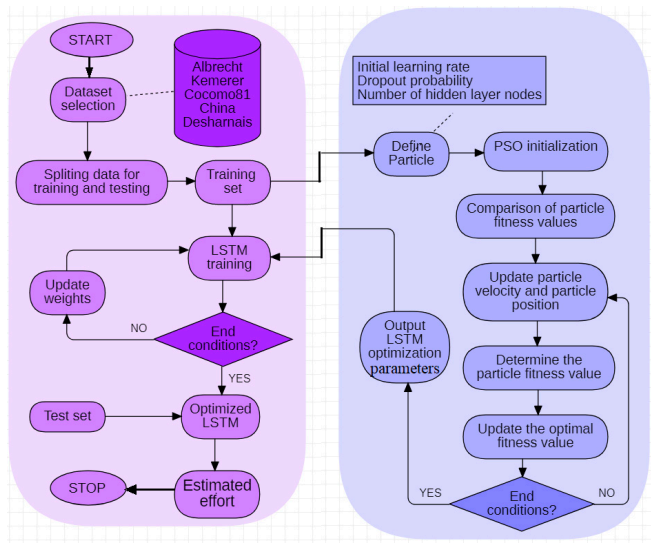

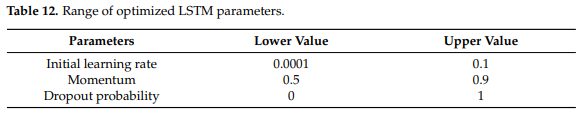

A otimização de enxame de partículas (PSO) [45] é um método de otimização pertencente ao campo da inteligência computacional, sendo derivado do estudo do comportamento de predação de aves. Cada partícula no método PSO se ajusta a uma possível solução do problema, sendo caracterizada por três métricas: velocidade, posição e aptidão. O PSO calcula o valor de aptidão das partículas através de um processo de atualização contínua da posição e velocidade durante o processo iterativo para atingir o ótimo global. O método PSO é caracterizado por uma rápida velocidade de busca, fácil convergência e grande eficiência.

No caso do método LSTM padrão, os valores de alguns hiperparâmetros, como a taxa de aprendizado inicial, a probabilidade de abandono e o momento, devem ser ajustados manualmente. A escolha de valores adequados para esses parâmetros é baseada na experiência dos pesquisadores. O peso da camada oculta LSTM representa a entrada do enxame de partículas. O erro de saída inicial do LSTM é usado como a aptidão do enxame de partículas, então o desempenho das partículas é analisado de acordo com a condição. O enxame de partículas inicial aleatório atualiza seu próprio parâmetro de acordo com o extremo individual e o extremo global.

In [90]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate
import random

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    medae = median_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    
    return mae, medae, rmse, r2

def load_arff(file_path):
    with open(file_path, 'r') as f:
        data = arff.load(f)

    attributes = [attr[0] for attr in data['attributes']]
    X = np.array(data['data'])[:, :-1]
    y = np.array(data['data'])[:, -1].astype(float)
    
    return X, y

output_file = "output_lstm_pso.txt"

sys.stdout = open(output_file, "w")
sys.stderr = open(output_file, "a")

# Parâmetros para LSTM
activation = 'tanh'  # Função de ativação
recurrent_activation = 'sigmoid'  # Função de ativação recorrente

# Parâmetros para PSO
population_size = 10
num_iterations = 50
acceleration_factor1 = 1.5
acceleration_factor2 = 1.5
range_initial_learning_rate = (0.0001, 0.1)
range_momentum = (0.5, 0.9)
range_dropout_probability = (0, 1)

metrics_data = []

# Valores para a sintonização de parâmetros do LSTM
epochs_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Número de épocas
num_neurons_values = [25, 50, 75, 100]  # Número de neurônios na camada oculta

for file_path in file_paths:
    X, y = load_arff(file_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Definindo a função de fitness para o PSO
    def fitness_function(parameters):
        initial_learning_rate = parameters[0]
        momentum = parameters[1]
        dropout_probability = parameters[2]

        model = Sequential()
        model.add(LSTM(num_neurons, activation=activation, recurrent_activation=recurrent_activation, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(dropout_probability))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='mean_squared_error')

        X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

        model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=32, verbose=0)

        y_pred = model.predict(X_test_reshaped)

        # Calculando métricas
        mae, _, _, _ = calculate_metrics(y_test, y_pred)
        return mae

    # Algoritmo PSO
    best_fitness = float('inf')
    best_parameters = None
    for _ in range(population_size):
        parameters = [random.uniform(range_initial_learning_rate[0], range_initial_learning_rate[1]),
                      random.uniform(range_momentum[0], range_momentum[1]),
                      random.uniform(range_dropout_probability[0], range_dropout_probability[1])]
        for _ in range(num_iterations):
            fitness = fitness_function(parameters)
            if fitness < best_fitness:
                best_fitness = fitness
                best_parameters = parameters[:]
            for i in range(len(parameters)):
                velocity = random.uniform(0, acceleration_factor1) * (best_parameters[i] - parameters[i]) \
                           + random.uniform(0, acceleration_factor2) * (best_parameters[i] - parameters[i])
                parameters[i] += velocity
    initial_learning_rate, momentum, dropout_probability = best_parameters

    # LSTM com os parâmetros otimizados pelo PSO
    for epochs in epochs_values:
        for num_neurons in num_neurons_values:
            model = Sequential()
            model.add(LSTM(num_neurons, activation=activation, recurrent_activation=recurrent_activation, input_shape=(X_train.shape[1], 1)))
            model.add(Dropout(dropout_probability))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
            X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
            model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=32, verbose=0)
            y_pred = model.predict(X_test_reshaped)
            mae, medae, rmse, r2 = calculate_metrics(y_test, y_pred)
            metrics_data.append([file_path, "MAE", mae, activation, recurrent_activation, dropout_probability, initial_learning_rate, momentum, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "Median Absolute Error", medae, activation, recurrent_activation, dropout_probability, initial_learning_rate, momentum, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "RMSE", rmse, activation, recurrent_activation, dropout_probability, initial_learning_rate, momentum, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])
            metrics_data.append([file_path, "R2 Score", r2, activation, recurrent_activation, dropout_probability, initial_learning_rate, momentum, epochs, num_neurons, min(y_pred), max(y_pred), np.mean(y_pred)])

print("=================Tabela LSTM com PSO=================")
print("\nMetrics | Datasets | Metric | Values | Parameters | Estimated | Effort")
print('\n')
headers = ["Dataset", "Metric", "metric valor", "Activation", "Recurrent Activation", "Dropout", "Initial Learning Rate", "Momentum", "Epochs", "Num Neurons", "Min", "Max", "Mean"]
print(tabulate(metrics_data, headers=headers))
print('\n')
sys.stdout.close()
sys.stderr.close()

ValueError: Invalid value -1.5096517531817768 received for `rate`, expected a value between 0 and 1.